# Telecom Customer Churn Analysis

## Submitted by: Group 7

### Contributors: *Fen Francis Pereira, Jayaram K, Ashmina T, Ashik James T*

**Objective:** To analyse the Telecom customer churn data so as to answer the following questions  
1) Compare churn count with respect to gender.  
2) Find out how many female senior citizens there in the dataset.  
3) Compare 'tenure' with 'Total Charges'.  
4) Find out which contract preffered by the senior citizen.  
5) Comment on your findings on Payment Method

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
telco_data = pd.read_excel('Telco-Customer-Churn.xlsx')

In [3]:
#fetching first 5 rows
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#displaying summary of the dataset
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Compare churn count with respect to gender.

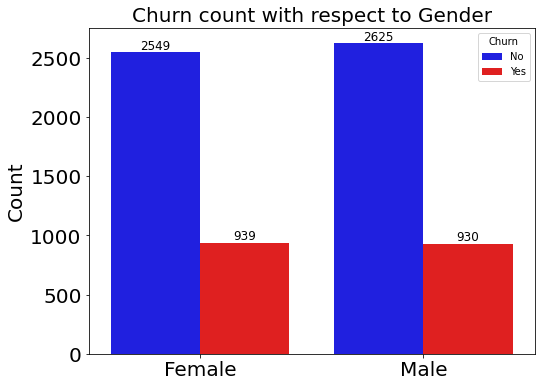

In [5]:
plt.figure(figsize=(8,6))
splot = sns.countplot(x="gender", hue='Churn', data=telco_data, palette=["#0000FF","#FF0000"])
plt.title('Churn count with respect to Gender', fontsize=20)
plt.xlabel(None)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar_label(splot.containers[0],fontsize=12)
plt.bar_label(splot.containers[1],fontsize=12)
plt.show()

Out of the total(7043) customers, about 26% (1869) discontinued their subscription. Of them the number of female customers was slightly higher(9 more than the male). Churn rate was slightly higher in female customers(approx. 26.9%) than the male customers(about 26.1%).

## 2. Find out how many female senior citizens there in the dataset.

In [6]:
#filtering senior citizens data and storing it into a new DataFrame
senior_data = telco_data[telco_data['SeniorCitizen'] == 1]
senior_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No


In [7]:
#filtering out female customers from the senior citizens
female_senior = senior_data[senior_data['gender']=="Female"]
female_senior.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
52,6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
54,4667-QONEA,Female,1,Yes,Yes,60,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No


In [8]:
#displaying the number of female senior citizens in the dataset
print("Number of female customers who are senior citizens :",len(female_senior))

Number of female customers who are senior citizens : 568


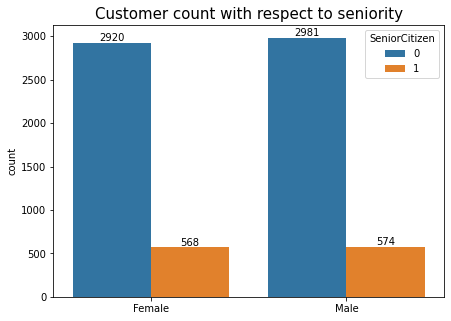

In [9]:
#alternatively we can get the count simply by plotting
plt.figure(figsize=(7,5))
fem_sen_plot = sns.countplot(x="gender", hue="SeniorCitizen", data=telco_data)
plt.title("Customer count with respect to seniority", fontsize=15)
plt.xlabel(None)
plt.bar_label(fem_sen_plot.containers[0])
plt.bar_label(fem_sen_plot.containers[1])
plt.show()

## 3. Compare 'tenure' with 'Total Charges'.

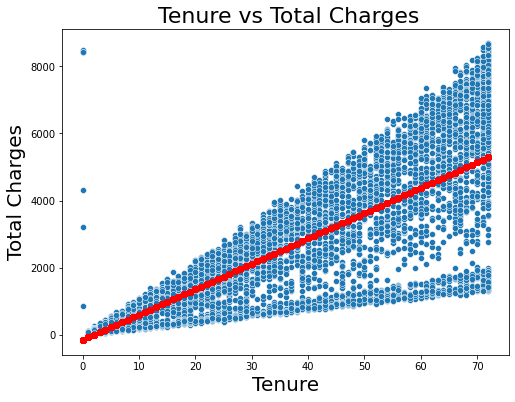

In [10]:
#drawing a scatterplot
plt.figure(figsize=(8,6))
x=telco_data['tenure']
y=telco_data['TotalCharges']
sns.scatterplot(x,y,data=telco_data)
plt.title(' Tenure vs Total Charges', size = 22)
plt.xlabel('Tenure', size = 20)
plt.ylabel('Total Charges', size = 20)
#to draw a line of trend
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r-o")
plt.show()

As 'tenure' increases total charge is also getting increased. Total amount charged varies with tenure length. Even customers with same tenure length are charged differently. That means not only tenure but some other factors are also taken into account for billing.

## 4. Find out which contract preffered by the senior citizen.

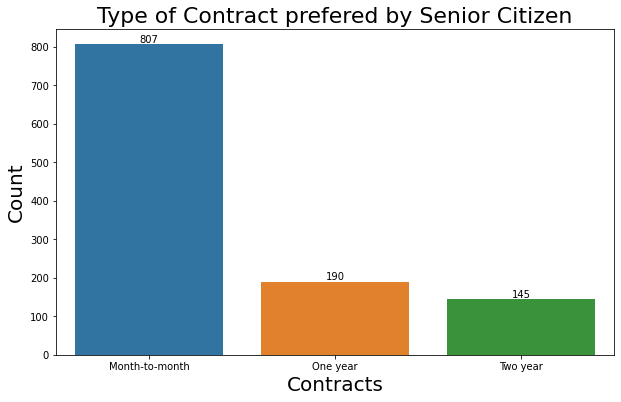

In [11]:
#we have previously filtered and stored senior citizens data in to the dataframe 'senior_data'
plt.figure(figsize=(10,6))
sen_contr_plot = sns.countplot(x="Contract",data = senior_data, order=senior_data["Contract"].value_counts().index)
plt.title('Type of Contract prefered by Senior Citizen', size = 22)
plt.xlabel('Contracts', size = 20)
plt.ylabel('Count', size = 20)
plt.bar_label(sen_contr_plot.containers[0])
plt.show()

Most of the senior citizens(about 70%) opted month-to-month plan. Very few(about 12.6%) subscribed for Two year contracts.

## 5. Comment on your findings on Payment Method

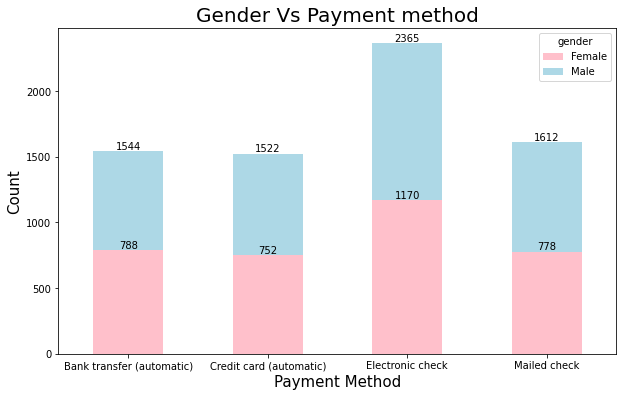

In [12]:
#to get the count of male and female across different payment methods
new_data=telco_data.groupby(['gender', 'PaymentMethod']).size().reset_index().pivot(columns='gender', index='PaymentMethod', values=0)
paym_gend=new_data.plot(kind="bar",stacked=True,figsize=(10,6),rot=0,color=["#FFC0CB","#ADD8E6"])
plt.title("Gender Vs Payment method",fontsize=20)
plt.xlabel("Payment Method",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.bar_label(paym_gend.containers[0])
plt.bar_label(paym_gend.containers[1])
plt.show()

Most of the customers,irrespective of gender, use Electronic check for paying bills. The least used method of payment is credit card(automatic).

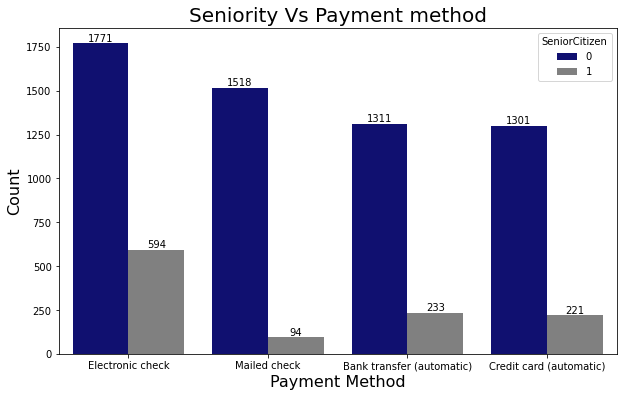

In [13]:
#to compare the payment methods used based on seniority of the customer
plt.figure(figsize=(10,6))
paym_seni=sns.countplot(x='PaymentMethod',hue='SeniorCitizen',data=telco_data,palette=["#000080","#808080"])
plt.title('Seniority Vs Payment method', size = 20)
plt.xlabel('Payment Method', size = 16)
plt.ylabel('Count', size = 16)
plt.bar_label(paym_seni.containers[0])
plt.bar_label(paym_seni.containers[1])
plt.show()

Electronic check seems to be the most common method of payment. Irrespective of age group,they prefer conventional way of payment rather than automatic payment. This shows that they want to check the bill before making payment.